In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


In [3]:
nside = 128
nside1 = 256
A = 1.7e3
alpha = -3.0
beta = -3.2
gamma = -2.5
ells = np.arange(3*nside)
ells1 = np.arange(3*nside1)
freqs = np.linspace(30, 300, 5)*1.e9

In [4]:
#create a filepath to store different power spectra
filepath = '/Users/alex/Documents/foreground_moments/power_spectra/'

In [5]:
const_params = [A, alpha, beta]
maps_const = ff.map_full_const_beta(ells, freqs, const_params)

In [6]:
%autoreload

In [7]:
params = [A, alpha, beta, gamma]
full_map = ff.map_full_power(ells, freqs, params)

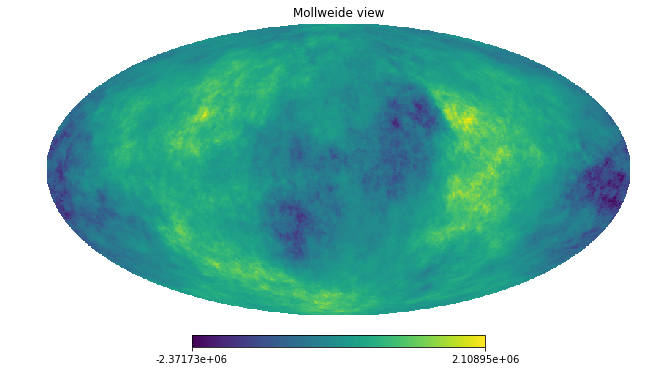

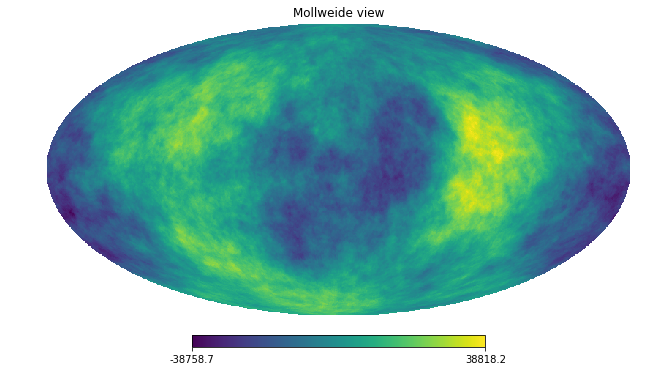

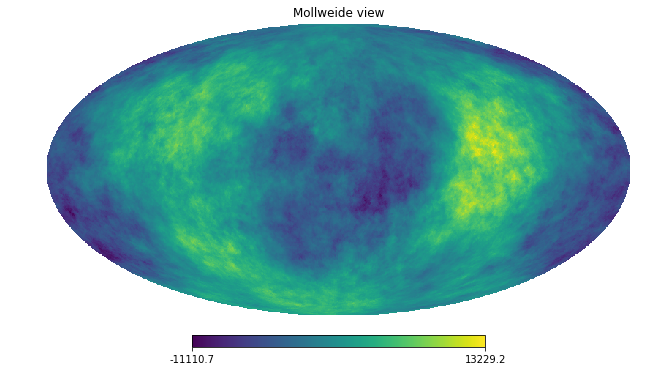

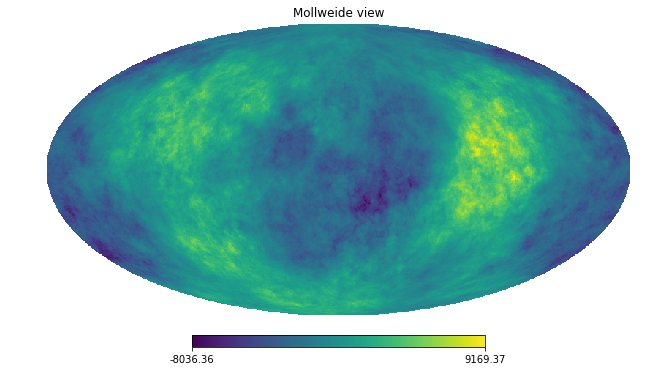

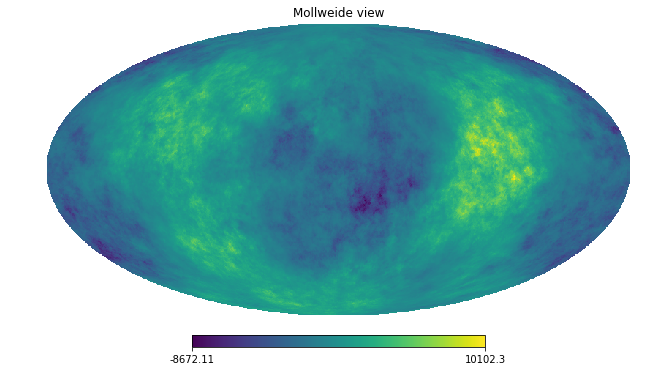

In [8]:
for i in range(len(freqs)):
    hp.mollview(full_map[i])

In [9]:
full_map1 = ff.map_full_power(ells1, freqs, params, nside=nside1)

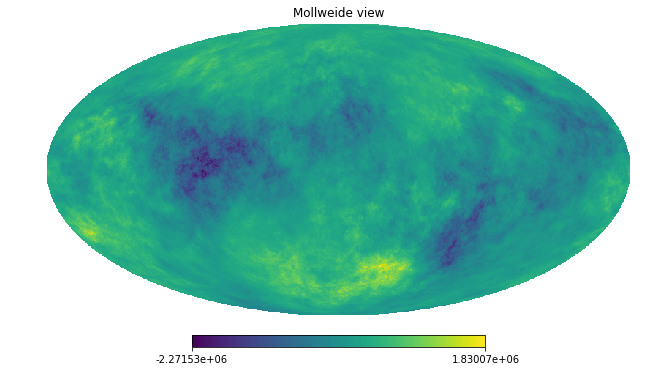

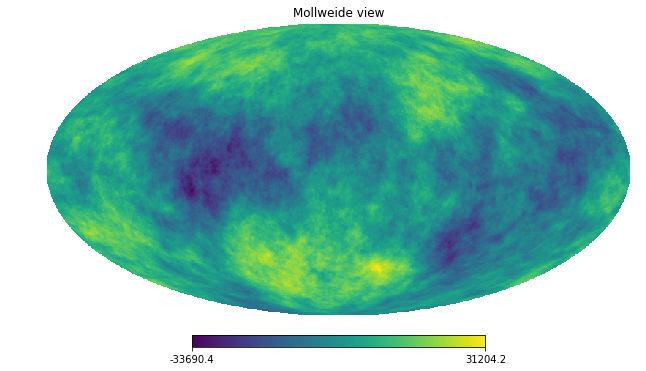

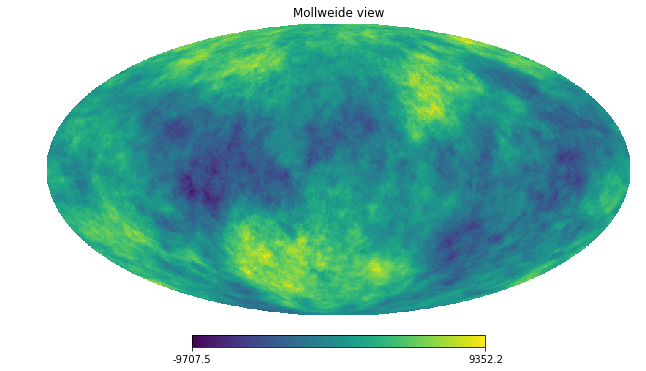

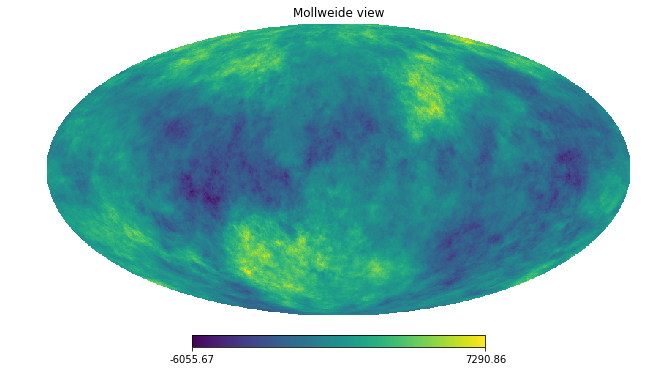

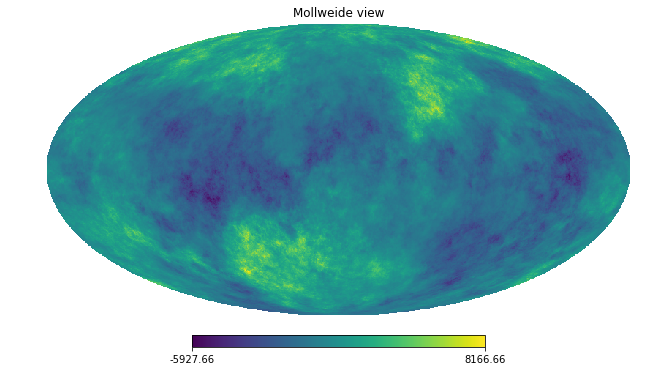

In [10]:
for i in range(len(freqs)):
    hp.mollview(full_map1[i])

In [11]:
full_map1.shape

(5, 786432)

In [12]:
hp.anafast(full_map1[0]).shape

(768,)

In [13]:
ps_test = ff.ps_data(ells, freqs, params)

In [14]:
mom00 = ff.auto0x0(ells, freqs, [A, alpha, beta])
mom11 = ff.auto1x1(ells, freqs, [A, alpha, beta, gamma])
mom02 = ff.auto0x2(ells, freqs, [A, alpha, beta, gamma])
model = ff.model(ells, freqs, [A, alpha, beta, gamma])

In [15]:
model - (mom00+mom11+mom02)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
%autoreload

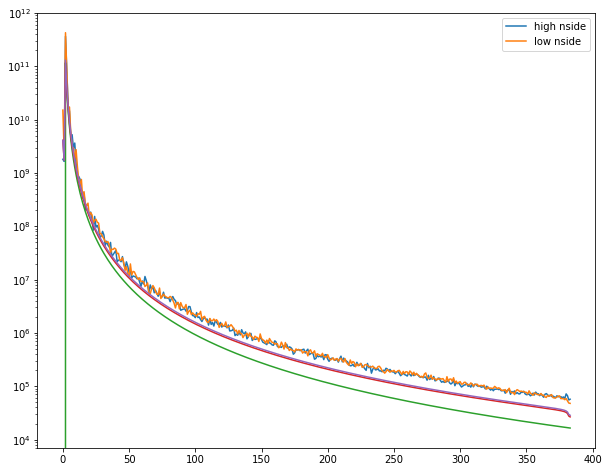

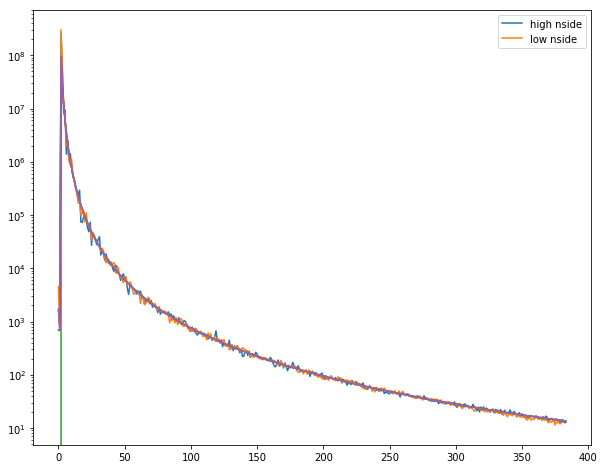

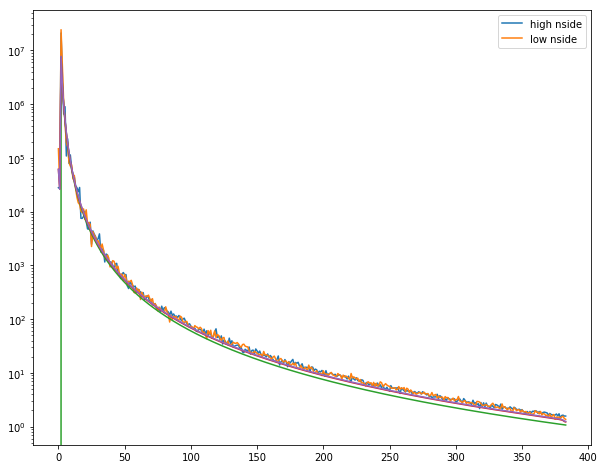

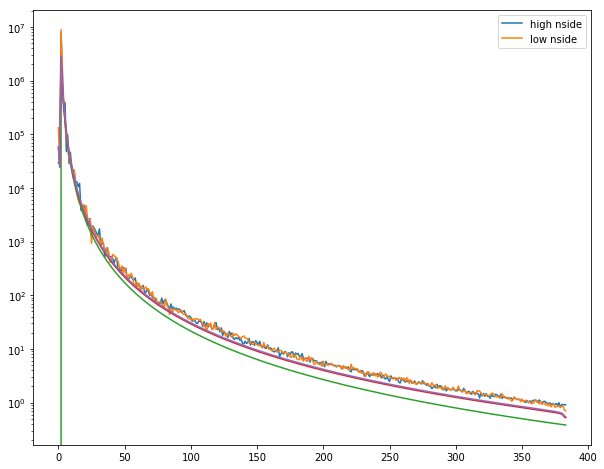

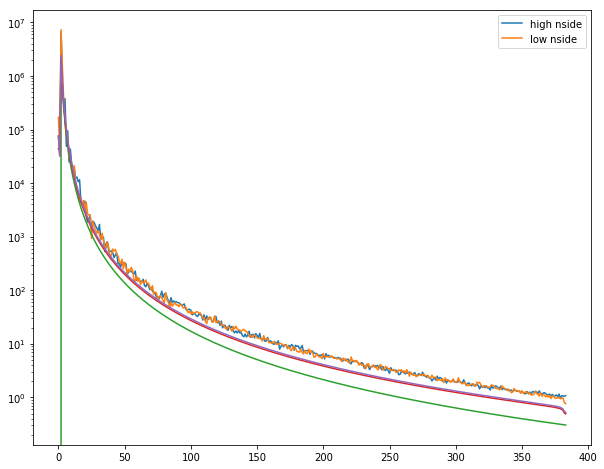

In [17]:
for i in range(len(freqs)):
    figure(figsize=(10,8))
    semilogy(ps_test[i][:384], label='high nside')
    semilogy(hp.anafast(full_map[i]), label='low nside')
    semilogy(mom00[i])
    semilogy(mom00[i]+mom11[i])
    semilogy(mom00[i]+mom11[i]+mom02[i])
    legend()